## Load the Data

In [5]:
import pandas as pd

# Load the CSV file
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Diet_Project\balanc_diet.csv")

# View first few rows
print(df.head())


     ID   Age  Gender Working_Type  Sleep_Hours  Height_m  \
0  5398  68.0  Female   Unemployed     6.627585  1.861374   
1  3078  19.0  Female     Desk Job     5.671469  1.732762   
2  6051  50.0  Female   Freelancer     7.060029  1.509387   
3  6503  54.0    Male   Healthcare     4.154597  1.832796   
4  3602  27.0  Female     Desk Job     3.847020  1.624670   

   Required_Daily_Calories  
0              1898.520157  
1              2439.173224  
2              1746.165518  
3              2461.167138  
4              2105.472452  


## Explore the Data

In [7]:
# Basic information
print(df.info())

# Summary statistics
print(df.describe())

# Check for null values
print(df.isnull().sum())

# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10200 non-null  int64  
 1   Age                      10171 non-null  float64
 2   Gender                   10200 non-null  object 
 3   Working_Type             10171 non-null  object 
 4   Sleep_Hours              10171 non-null  float64
 5   Height_m                 10171 non-null  float64
 6   Required_Daily_Calories  10171 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 557.9+ KB
None
                 ID           Age   Sleep_Hours      Height_m  \
count  10200.000000  10171.000000  10171.000000  10171.000000   
mean    5096.418039     43.839740      6.937515      1.726852   
std     2943.782520     15.529117      1.766246      0.113953   
min        1.000000     10.000000      3.000000      1.300000   
25%     2549

## Clean the Data

In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Diet_Project\balanc_diet.csv")

# Step 1: Drop duplicates
df = df.drop_duplicates()

# Step 2: Handle missing values
num_cols = ['Age', 'Sleep_Hours', 'Height_m', 'Required_Daily_Calories']
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = ['Gender', 'Working_Type']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Step 3: Standardize text columns
df['Gender'] = df['Gender'].str.strip().str.title()
df['Working_Type'] = df['Working_Type'].str.strip().str.title()

# Step 4: Convert to correct data types
df['Age'] = df['Age'].astype(int)
df['Sleep_Hours'] = df['Sleep_Hours'].astype(float)
df['Height_m'] = df['Height_m'].astype(float)
df['Required_Daily_Calories'] = df['Required_Daily_Calories'].astype(float)

# Optional: Print final shape and info
print("✔️ Cleaned data shape:", df.shape)
print(df.info())



✔️ Cleaned data shape: (10100, 7)
<class 'pandas.core.frame.DataFrame'>
Index: 10100 entries, 0 to 10199
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10100 non-null  int64  
 1   Age                      10100 non-null  int32  
 2   Gender                   10100 non-null  object 
 3   Working_Type             10100 non-null  object 
 4   Sleep_Hours              10100 non-null  float64
 5   Height_m                 10100 non-null  float64
 6   Required_Daily_Calories  10100 non-null  float64
dtypes: float64(3), int32(1), int64(1), object(2)
memory usage: 591.8+ KB
None


## Create a Health Score Column

In [11]:
# Health Score logic:
# Higher sleep, balanced calories, and normal BMI = higher score

# Calculate BMI from height and a random assumed weight (can be replaced by real data if available)
# Assuming dummy constant weight = 65kg for calculation
weight = 65  # kg
df['BMI'] = weight / (df['Height_m'] ** 2)

# Create Health Score (simplified logic)
df['Health_Score'] = (
    (df['Sleep_Hours'] * 1.5)
    + (df['Required_Daily_Calories'] / 1000)
    - (df['BMI'] / 5)
)

# Categorize score
def label_health(score):
    if score >= 10:
        return 'Healthy'
    elif score >= 7:
        return 'Moderate'
    else:
        return 'Unhealthy'

df['Health_Category'] = df['Health_Score'].apply(label_health)


## Exploratory Data Analysis (EDA)

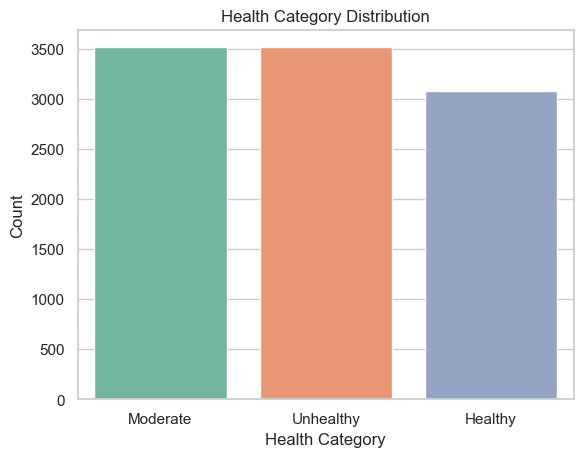

C:\Users\DELL\AppData\Local\Temp\ipykernel_17736\2416980584.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette="Set1")


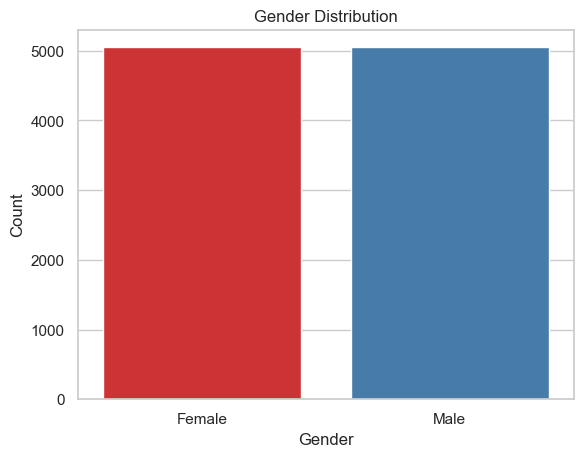

C:\Users\DELL\AppData\Local\Temp\ipykernel_17736\2416980584.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Working_Type', y='Health_Score', palette='Pastel1')


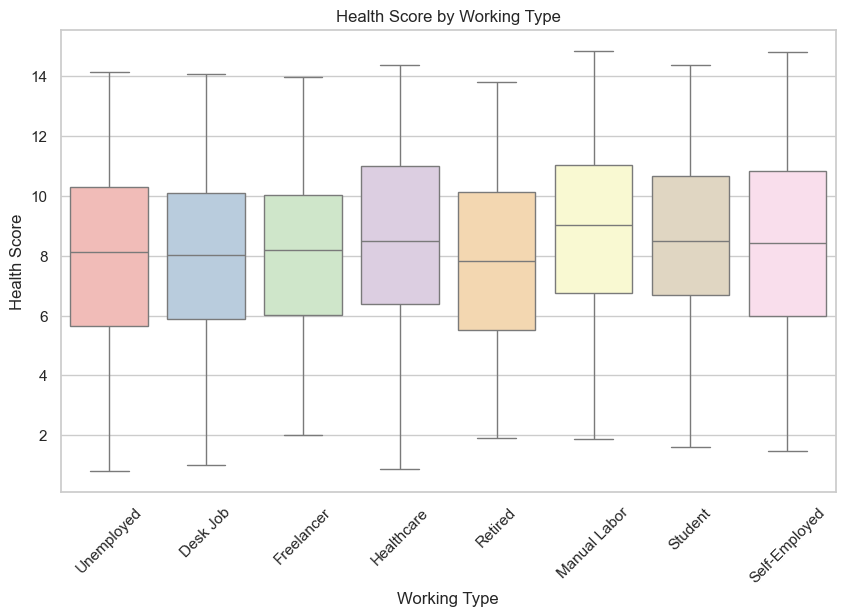

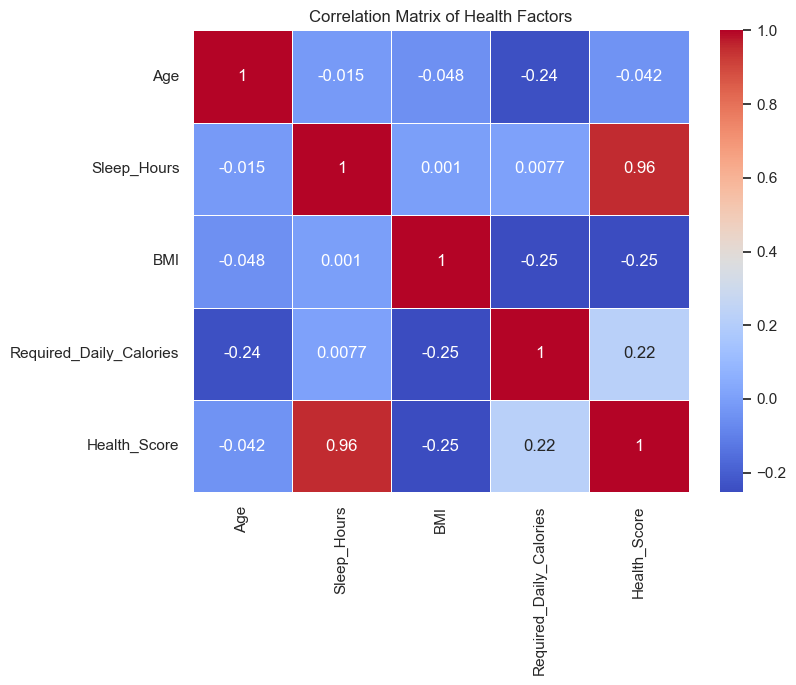

Top 10 Healthiest Individuals:
         ID  Health_Score Health_Category
10166  7409     14.849687         Healthy
5577   9755     14.813161         Healthy
7927   5592     14.462675         Healthy
3225   8107     14.368143         Healthy
6423   4317     14.367941         Healthy
8179   4970     14.333328         Healthy
1441   8488     14.213178         Healthy
3021   4826     14.197684         Healthy
5392   9015     14.181096         Healthy
5394   2878     14.172549         Healthy


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set(style="whitegrid")

# 1. Health Category Distribution with colors
sns.countplot(data=df, x='Health_Category', hue='Health_Category', palette="Set2", legend=False)


plt.title('Health Category Distribution')
plt.xlabel('Health Category')
plt.ylabel('Count')
plt.show()

# 2. Gender Distribution
sns.countplot(data=df, x='Gender', palette="Set1")
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 3. Boxplot: Health Score by Working Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Working_Type', y='Health_Score', palette='Pastel1')
plt.title('Health Score by Working Type')
plt.xlabel('Working Type')
plt.ylabel('Health Score')
plt.xticks(rotation=45)
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age', 'Sleep_Hours', 'BMI', 'Required_Daily_Calories', 'Health_Score']].corr(), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Health Factors')
plt.show()


# 5. Top 10 individuals with highest health scores
print("Top 10 Healthiest Individuals:")
print(df[['ID', 'Health_Score', 'Health_Category']].sort_values('Health_Score', ascending=False).head(10))


## Export the Cleaned Data

In [19]:
# Save cleaned and enriched data
df.to_csv(r"C:\Users\DELL\OneDrive\Desktop\Diet_Project\clean_balanced_diet.csv", index=False)

print(" Cleaned and enriched dataset saved as 'clean_balanced_diet.csv'")



 Cleaned and enriched dataset saved as 'clean_balanced_diet.csv'
